In [1]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cnxn_string = ('postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}')

In [3]:
engine = create_engine(cnxn_string.format(
    username = 'postgres', pswd = '0923', host = 'localhost', port = 5432, database = 'Assign'))

In [4]:
query3a_1 = """
SELECT fullname, SUM(itemtotal)::money::numeric::float8 AS total_spend, COUNT(DISTINCT txnnumber) AS num_txn FROM transactions
GROUP BY fullname
ORDER BY total_spend DESC, fullname;
"""
top_emp_dollar_3a1 = pd.read_sql_query(query3a_1, engine)

Text(0.5, 1.0, 'Top 20 Employees with Greatest P-Card Total Spendings')

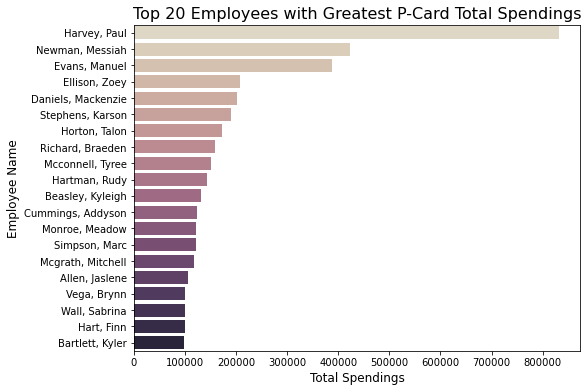

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x='total_spend', y='fullname', data=top_emp_dollar_3a1.head(20), palette="ch:s=-.2,r=.6")
plt.xlabel('Total Spendings', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.title('Top 20 Employees with Greatest P-Card Total Spendings', fontsize=16)

In [6]:
query3a_2 = """
SELECT fullname,  COUNT(DISTINCT txnnumber) AS num_txn, SUM(itemtotal)::money::numeric::float8 AS total_spend FROM transactions
GROUP BY fullname
ORDER BY num_txn DESC, fullname;
"""
top_emp_txn_3a2 = pd.read_sql_query(query3a_2, engine)

Text(0.5, 1.0, 'Top 20 Employees with Greatest P-Card Total Transacrions')

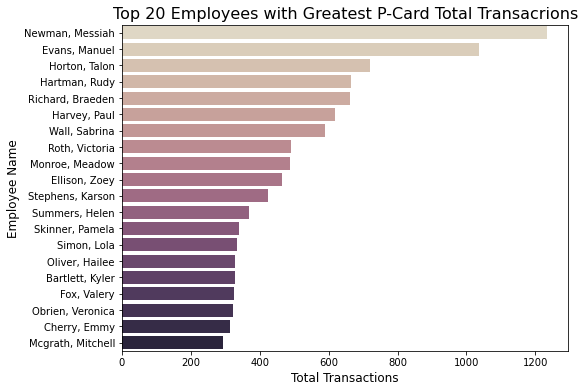

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(x='num_txn', y='fullname', data=top_emp_txn_3a2.head(20), palette="ch:s=-.2,r=.6")
plt.xlabel('Total Transactions', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.title('Top 20 Employees with Greatest P-Card Total Transacrions', fontsize=16)

In [8]:
query3b_1 = """
SELECT vendorname, SUM(itemtotal)::money::numeric::float8 AS total_spend, COUNT(DISTINCT txnnumber) AS num_txn FROM transactions
GROUP BY vendorname
ORDER BY total_spend DESC, vendorname;
"""
top_vendor_dollar_3b1 = pd.read_sql_query(query3b_1, engine)

Text(0.5, 1.0, 'Top 20 Vendors with Greatest P-Card Total Spendings')

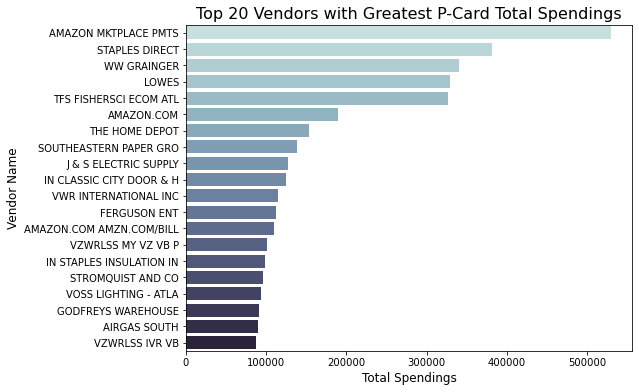

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(x='total_spend', y='vendorname', data=top_vendor_dollar_3b1.head(20), palette="ch:start=.2,rot=-.3")
plt.xlabel('Total Spendings', fontsize=12)
plt.ylabel('Vendor Name', fontsize=12)
plt.title('Top 20 Vendors with Greatest P-Card Total Spendings', fontsize=16)

In [10]:
query3b_2 = """
SELECT vendorname, COUNT(DISTINCT txnnumber) AS num_txn, SUM(itemtotal)::money::numeric::float8 AS total_spend FROM transactions
GROUP BY vendorname
ORDER BY num_txn DESC, vendorname;
"""
top_vendor_txn_3b2 = pd.read_sql_query(query3b_2, engine)

Text(0.5, 1.0, 'Top 20 Vendors with Greatest P-Card Total Transacrions')

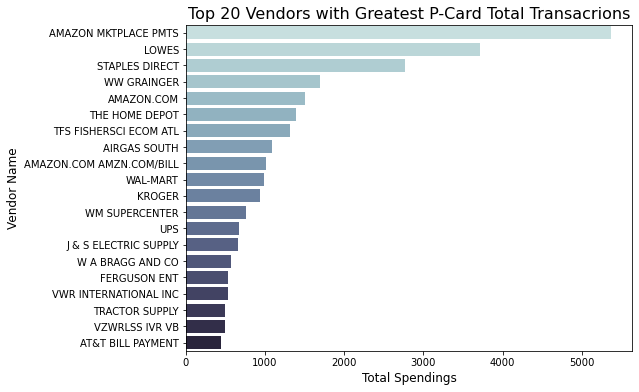

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x='num_txn', y='vendorname', data=top_vendor_txn_3b2.head(20), palette="ch:start=.2,rot=-.3")
plt.xlabel('Total Spendings', fontsize=12)
plt.ylabel('Vendor Name', fontsize=12)
plt.title('Top 20 Vendors with Greatest P-Card Total Transacrions', fontsize=16)

In [12]:
query3c = """
SELECT departmentname, EXTRACT(MONTH FROM postdate) AS MONTH, EXTRACT(YEAR FROM postdate) AS YEAR, SUM(itemtotal)::money::numeric::float8 AS dep_total_spend 
FROM transactions
GROUP BY MONTH, YEAR, departmentname
ORDER BY departmentname, YEAR, MONTH;
"""
month_department_3c = pd.read_sql_query(query3c, engine)

In [13]:
df = month_department_3c[['departmentname', 'dep_total_spend']].groupby('departmentname', as_index=False).sum().sort_values('dep_total_spend', ascending=False)

In [14]:
dep_list = df['departmentname'][0:20].tolist()
top = month_department_3c[month_department_3c['departmentname'].isin(dep_list)]

In [15]:
pivot_df = top.pivot(index='departmentname', columns='month', values='dep_total_spend')
pivot_df = pivot_df.fillna(0)
pivot_df

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
departmentname,,,,,,,,,,,,
Building A/C Shop,40551.77,45840.49,34671.71,6374.28,5728.27,3192.24,40521.71,38268.37,48305.27,52887.84,42966.89,56312.33
Electric Shop,20681.73,22432.58,35531.20,3538.62,971.98,5323.33,19957.77,38974.02,28808.13,35700.44,18506.39,19151.26
Grounds Dept,23839.13,27281.65,0.00,0.00,0.00,0.00,41828.61,35354.32,26838.06,31082.23,36336.64,24652.89
Off Zone Shop,16600.55,17589.42,27473.65,9438.52,0.00,0.00,30757.82,35492.04,25539.92,30024.88,23656.29,19738.10
Services Dept,19117.92,26361.97,19522.38,6534.13,5665.47,11440.48,33135.36,41117.11,32468.25,55694.28,25815.22,21957.23
Structural Support Shop,16260.44,22457.57,16351.97,7540.23,4482.81,14696.64,13961.65,23967.72,22168.90,23491.87,38704.80,24249.42
FMD Plumbing Shop,28218.31,32005.13,25235.58,6634.81,8526.38,6144.23,21053.17,19655.81,24523.91,34097.88,17142.39,22969.55
Animal & Dairy Science,37436.45,23075.96,26709.42,18875.42,17578.44,15672.55,54539.11,36516.01,29052.51,47675.32,38684.12,47103.38
Business Outreach Svcs,15199.07,31228.79,25376.44,31858.51,22269.79,19382.52,32357.41,50271.22,25107.21,24678.89,22300.38,23983.94


Text(0.5, 1.0, 'Top 20 Departments with Greatest Annual Spendings')

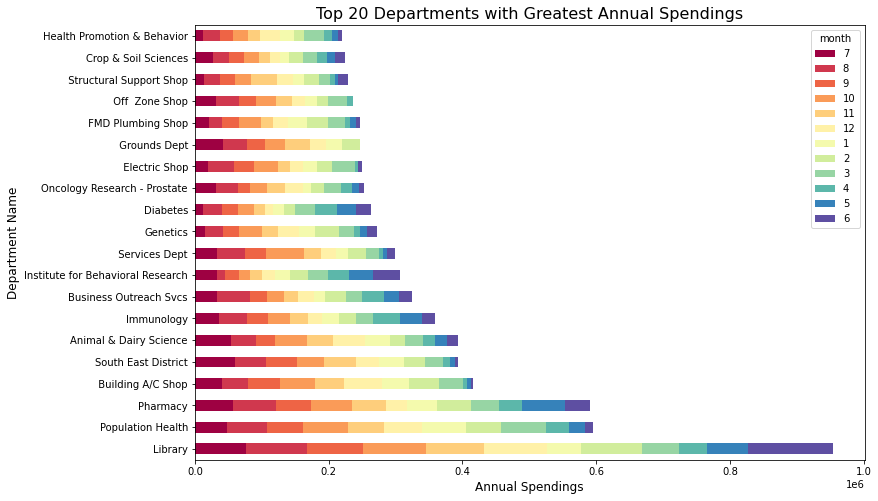

In [16]:
pivot_df.loc[:,[7,8,9,10,11,12,1,2,3,4,5,6]].loc[dep_list,:].plot.barh(stacked=True, cmap="Spectral", figsize=(12,8))
plt.xlabel('Annual Spendings', fontsize=12)
plt.ylabel('Department Name', fontsize=12)
plt.title('Top 20 Departments with Greatest Annual Spendings', fontsize=16)

In [17]:
query3d_1 = """
SELECT singletransactionlimit, COUNT(fullname) AS num_emp FROM users 
GROUP BY singletransactionlimit;
"""
emp_single_txn_limit_3d1 = pd.read_sql_query(query3d_1, engine)

In [18]:
query3d_2 = """
SELECT DISTINCT users.fullname, txnnumber, singletransactionlimit::money::numeric::float8, amount::money::numeric::float8 
FROM users LEFT OUTER JOIN transactions ON users.fullname = transactions.fullname 
WHERE amount > singletransactionlimit 
ORDER BY fullname;
"""
single_txn_vio_3d2 = pd.read_sql_query(query3d_2, engine)

In [19]:
query3d_3 = """
SELECT DISTINCT fullname, MONTH, YEAR, monthly_spend FROM 
(SELECT fullname, EXTRACT(MONTH FROM postdate) AS MONTH, EXTRACT(YEAR FROM postdate) AS YEAR, 
 SUM(itemtotal)::money::numeric::float8 AS monthly_spend FROM transactions
 GROUP BY MONTH, YEAR, fullname) AS t1 
WHERE monthly_spend > 10000
ORDER BY fullname, YEAR, MONTH;
"""
month_txn_vio_3d3 = pd.read_sql_query(query3d_3, engine)

In [20]:
query3d_4 = """
SELECT DISTINCT t1.fullname, COALESCE(mon_vio_num,0) AS mon_vio, COALESCE(txn_vio_num,0) AS txn_vio, 
(COALESCE(mon_vio_num,0) + COALESCE(txn_vio_num,0)) AS Total_Violations FROM 
 (SELECT fullname, COUNT(*) AS txn_vio_num FROM 
  (SELECT users.fullname, txnnumber, singletransactionlimit, amount 
   FROM users LEFT OUTER JOIN transactions ON users.fullname = transactions.fullname 
   WHERE amount > singletransactionlimit) AS t1
  GROUP BY fullname
  ORDER BY txn_vio_num DESC) AS t1 
LEFT OUTER JOIN
 (SELECT fullname, COUNT(*) AS mon_vio_num FROM 
  (SELECT fullname, EXTRACT(MONTH FROM postdate) AS MONTH, EXTRACT(YEAR FROM postdate) AS YEAR, SUM(itemtotal) AS monthly_spend FROM transactions
   GROUP BY MONTH, YEAR, fullname) AS t1 
  WHERE monthly_spend > '$10000'
  GROUP BY t1.fullname) AS t3
 ON t1.fullname = t3.fullname
 ORDER BY Total_Violations DESC;
"""
txn_vio_table_3d4 = pd.read_sql_query(query3d_4, engine)

Text(0.5, 1.0, 'Top 20 Employees with Transaction Limit Violations')

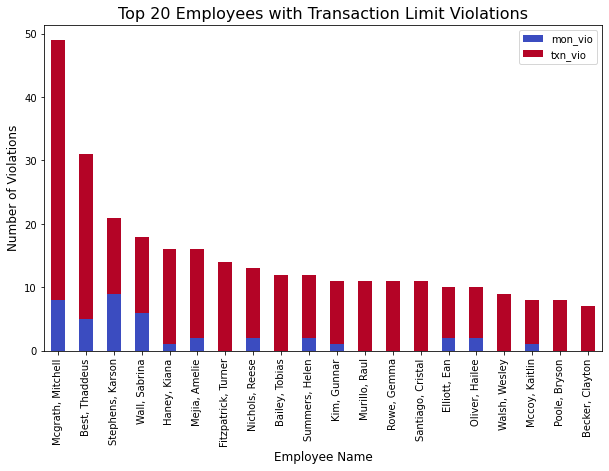

In [21]:
txn_vio_table_3d4.head(20).plot(x='fullname', y=['mon_vio', 'txn_vio'], kind='bar', stacked=True, cmap="coolwarm", figsize=(10,6))
plt.xlabel('Employee Name', fontsize=12)
plt.ylabel('Number of Violations', fontsize=12)
plt.title('Top 20 Employees with Transaction Limit Violations', fontsize=16)

In [22]:
query3e_1 = """
SELECT fullname, SUM(numberperdate) AS numberofviolations FROM 
(SELECT fullname, postdate, vendorname, COUNT(DISTINCT txnnumber) AS numberperdate FROM transactions 
 GROUP BY fullname, postdate, vendorname 
 HAVING COUNT(DISTINCT txnnumber) > 1) AS numberperdateviolations
GROUP BY fullname
ORDER BY numberofviolations DESC;
"""
txn_splitbytxn_emp_date_vender_3e1 = pd.read_sql_query(query3e_1, engine)

Text(0.5, 1.0, 'Top 20 Employees with Violations (Split Multiple Transactions)')

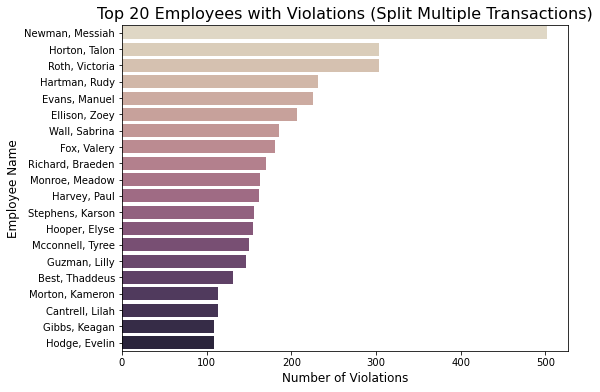

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='numberofviolations', y='fullname', data=txn_splitbytxn_emp_date_vender_3e1.head(20), palette="ch:s=-.2,r=.6")
plt.xlabel('Number of Violations', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.title('Top 20 Employees with Violations (Split Multiple Transactions)', fontsize=16)

In [24]:
query3e_2 = """
SELECT MONTH, YEAR, SUM(numberperdate) AS numberofviolations FROM 
(SELECT COUNT(DISTINCT txnnumber) AS numberperdate, EXTRACT(MONTH FROM postdate) AS MONTH, EXTRACT(YEAR FROM postdate) AS YEAR 
 FROM transactions 
 GROUP BY postdate, vendorname 
 HAVING COUNT(DISTINCT fullname) > 1) AS numberperdateviolations
GROUP BY MONTH, YEAR
ORDER BY YEAR, MONTH;
"""
txn_splitbyemp_date_vender_3e2 = pd.read_sql_query(query3e_2, engine)

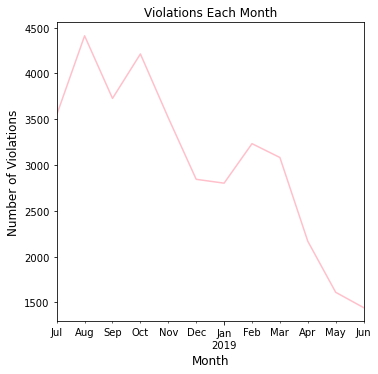

In [25]:
ax = txn_splitbyemp_date_vender_3e2.set_index(pd.to_datetime(txn_splitbyemp_date_vender_3e2[['year','month']]
                                                             .assign(day=1)))['numberofviolations']\
       .plot(color='Pink', figsize=(5.5,5.5), title='Violations Each Month')
_ = ax.set_xlabel('Month', fontsize=12)
_ = ax.set_ylabel('Number of Violations', fontsize=12)

In [26]:
query3e_3 = """
SELECT fullname, SUM(numberperdate) AS numberofviolations FROM 
(SELECT fullname, postdate, COUNT(DISTINCT txnnumber) AS numberperdate FROM transactions 
 GROUP BY fullname, postdate 
 HAVING COUNT(DISTINCT vendorname) > 1) AS numberperdateviolations
GROUP BY fullname
ORDER BY numberofviolations DESC;
"""
txn_splitbyvender_date_employee_3e3 = pd.read_sql_query(query3e_3, engine)

Text(0.5, 1.0, 'Top 20 Employees with Violations (Split Multiple Vendors)')

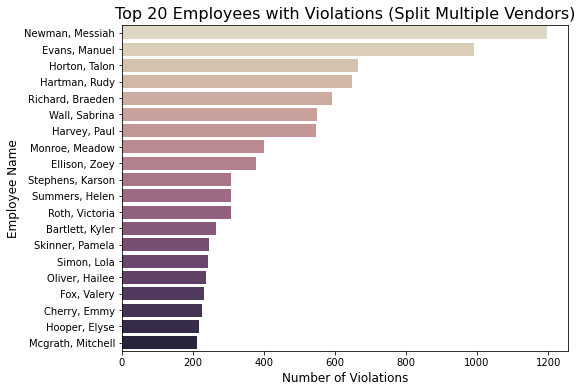

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='numberofviolations', y='fullname', data=txn_splitbyvender_date_employee_3e3.head(20), palette="ch:s=-.2,r=.6")
plt.xlabel('Number of Violations', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.title('Top 20 Employees with Violations (Split Multiple Vendors)', fontsize=16)

In [28]:
query3f = """
SELECT DISTINCT vendorname, SUM(itemtotal)::money::numeric::float8 AS total FROM transactions
WHERE vendorname NOT IN 
(SELECT vendorname FROM vendors)
GROUP BY vendorname
ORDER BY total DESC;
"""
unapprove_vender_3f = pd.read_sql_query(query3f, engine)

Text(0.5, 1.0, 'Unapproved Vendors with Total Spendings')

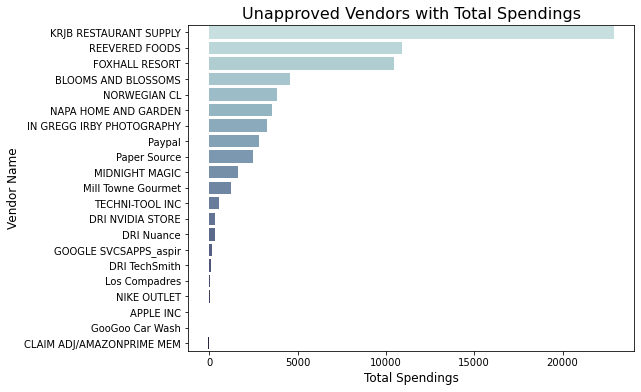

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='total', y='vendorname', data=unapprove_vender_3f, palette="ch:start=.2,rot=-.3")
plt.xlabel('Total Spendings', fontsize=12)
plt.ylabel('Vendor Name', fontsize=12)
plt.title('Unapproved Vendors with Total Spendings', fontsize=16)

In [30]:
query3g = """
SELECT signoff FROM transactions
"""
sign_off_3g = pd.read_sql_query(query3g, engine)

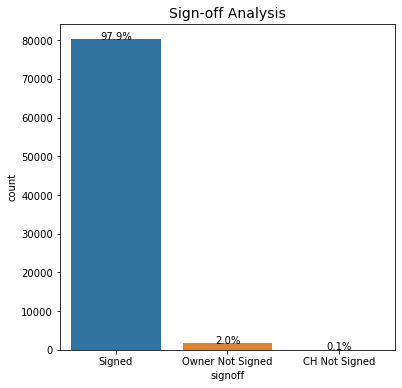

In [31]:
plt.figure(figsize=(6, 6))
ax=sns.countplot(x='signoff', data=sign_off_3g)
total = (len(sign_off_3g['signoff'])) # one person per row 
plt.title('Sign-off Analysis', fontsize=14)
ax.set_xticklabels(('Signed', 'Owner Not Signed','CH Not Signed')) 

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+20
    ax.annotate(percentage, (x, y),ha='center')

In [32]:
query3h = """
SELECT *, EXTRACT(DOW FROM postdate) AS day_of_week FROM transactions;
"""
day_of_week_3h = pd.read_sql_query(query3h, engine)

In [33]:
df = day_of_week_3h[['txnnumber', 'day_of_week']].groupby('day_of_week', as_index=False).count().sort_values('txnnumber', ascending=False)
df['day_of_week'].replace({1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thursday', 5:'Friday'}, inplace=True)

Text(0.5, 1.0, 'Transactions')

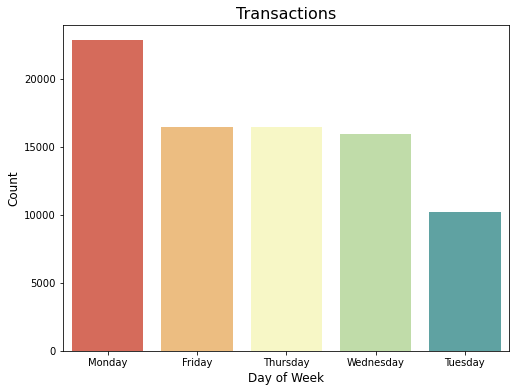

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_week', y='txnnumber', data=df, palette="Spectral")
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Transactions', fontsize=16)

In [35]:
query3i_1 = """
WITH keyword AS
(SELECT UNNEST(array['misc', 'special', 'fee', 'friend', 'gift', 'directed', 'other', 'refund', 'repay', 'personal', 'construction', 'decor', 'travel', 'split', 'chemical', 'break room', 'unallow', 'install', 'insurance', 'entertain']) AS word)
SELECT word, COUNT(*) AS word_count FROM transactions, keyword 
WHERE LOWER(comments) LIKE '%%' || word || '%%'
GROUP BY word
ORDER BY COUNT(*) DESC;
"""
count_key_word_3i1 = pd.read_sql_query(query3i_1, engine)

In [36]:
query3i_2 = """
WITH keyword AS
(SELECT UNNEST(array['misc', 'special', 'fee', 'friend', 'gift', 'directed', 'other', 'refund', 'repay', 'personal', 'construction', 'decor', 'travel', 'split', 'chemical', 'break room', 'unallow', 'install', 'insurance', 'entertain']) AS word)
SELECT word, SUM(itemtotal)::money::numeric::float8 AS total_amount FROM transactions, keyword 
WHERE LOWER(comments) LIKE '%%' || word || '%%'
GROUP BY word
ORDER BY SUM(itemtotal) DESC;
"""
total_amount_key_word_3i2 = pd.read_sql_query(query3i_2, engine)

In [37]:
query3i_3 = """
WITH keyword AS
(SELECT UNNEST(array['misc', 'special', 'fee', 'friend', 'gift', 'directed', 'other', 'refund', 'repay', 'personal', 'construction', 'decor', 'travel', 'split', 'chemical', 'break room', 'unallow', 'install', 'insurance', 'entertain']) AS word)
SELECT word, COUNT(DISTINCT fullname) AS employee_count FROM transactions, keyword 
WHERE LOWER(comments) LIKE '%%' || word || '%%'
GROUP BY word
ORDER BY 2 DESC;
"""
employee_top_key_word_3i3 = pd.read_sql_query(query3i_3, engine)

In [38]:
query3i_4 = """
SELECT DISTINCT fullname FROM transactions WHERE comments IS NULL;
"""
no_comment_3i4 = pd.read_sql_query(query3i_4, engine)

In [39]:
query3i_5 = """
SELECT fullname, SUM(itemtotal)::money::numeric::float8 AS total_amount FROM transactions
WHERE comments IS NULL
GROUP BY fullname
ORDER BY total_amount DESC
"""
no_comment_amount_employee_3i5 = pd.read_sql_query(query3i_5, engine)

In [40]:
query3i_6 = """
SELECT fullname, COUNT(DISTINCT txnnumber) AS num_txn FROM transactions
WHERE comments IS NULL
GROUP BY fullname
ORDER BY num_txn DESC
"""
no_comment_txn_employee_3i6 = pd.read_sql_query(query3i_6, engine)

In [41]:
query3j = """
WITH emp_comments AS (
	SELECT DISTINCT fullname, string_agg(comments, ' ') AS agg_comment FROM transactions GROUP BY fullname),
t_words AS (
	SELECT fullname, 
	(TS_LEXIZE('english_stem', 
			   UNNEST(STRING_TO_ARRAY(REGEXP_REPLACE(token, '\y(|A|an|in|but|and|the|of|for|to|on|at|LS|x|p)\y', ' ', 'g'), 
									  ' '))))[1] AS token 
FROM (SELECT fullname, 
	  (TS_LEXIZE('english_stem',
				 UNNEST(STRING_TO_ARRAY(REGEXP_REPLACE(agg_comment,
													   '[^a-zA-Z]+', ' ', 'g'), ' '))))[1] AS token FROM emp_comments) AS t1),
t_tf AS (
	SELECT fullname, token, 
	COUNT(*) OVER (PARTITION BY token ORDER BY fullname) AS total_num_t_doc, 
	COUNT(*) OVER (PARTITION BY fullname) AS total_num_terms_doc
	FROM t_words WHERE token IS NOT NULL),
t_idf_calc AS (
	SELECT token, COUNT(fullname) AS num_doc_with_t FROM t_words GROUP BY token),
t_idf AS (
	SELECT t_tf.fullname, t_tf.token, total_num_t_doc, total_num_terms_doc, 
	(CAST(total_num_t_doc AS DECIMAL (7,2))/CAST(total_num_terms_doc AS DECIMAL (7,2))) AS TF,
	num_doc_with_t, (SELECT COUNT(DISTINCT fullname) FROM transactions) AS total_doc
	FROM t_tf INNER JOIN t_idf_calc ON t_tf.token=t_idf_calc.token
	ORDER BY t_tf.fullname, t_tf.token),
t_tf_idf AS (
	SELECT fullname, token, TF, COALESCE(LOG(total_doc)/NULLIF(LOG(num_doc_with_t),0),0) AS IDF,
	TF*COALESCE(LOG(total_doc)/NULLIF(LOG(num_doc_with_t),0),0) AS TF_IDF
	FROM t_idf)
SELECT DISTINCT fullname, token, TF, IDF, TF_IDF FROM t_tf_idf ORDER BY fullname, token;
"""
TF_IDF_3j = pd.read_sql_query(query3j, engine)

In [42]:
queryline = """
SELECT postdate, COUNT(*) FROM transactions
GROUP BY postdate
"""
timeseries_df = pd.read_sql_query(queryline, engine)

In [43]:
queryline = """
SELECT postdate, SUM(amount)::money::numeric::float8 FROM transactions
GROUP BY postdate
"""
timeseries_df2 = pd.read_sql_query(queryline, engine)

In [44]:
queryline = """
SELECT fullname, streetaddress, city, state, zipcode FROM users
"""
address= pd.read_sql_query(queryline, engine)

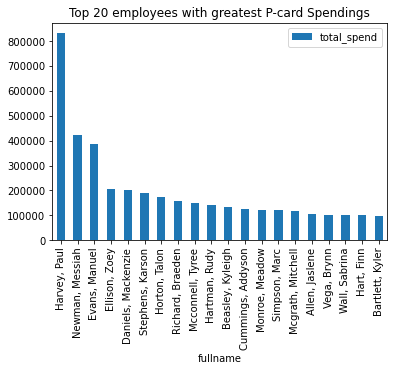

In [45]:
top_emp_dollar_3a1.head(20).plot.bar(x='fullname', y='total_spend', title='Top 20 employees with greatest P-card Spendings')

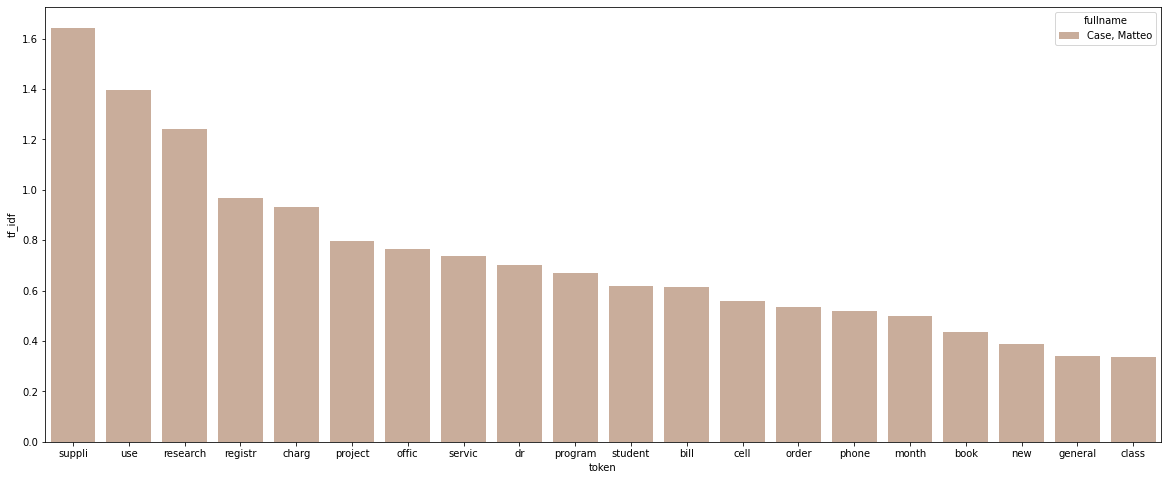

In [46]:
plt.figure(figsize=(20,8))
sns.barplot(x='token', y='tf_idf', 
            hue="fullname" ,
            data=TF_IDF_3j[TF_IDF_3j["fullname"]=="Case, Matteo"].sort_values(by=['tf_idf'], ascending=0).head(20),
           palette="pink")

Text(0.5, 0, 'Token')

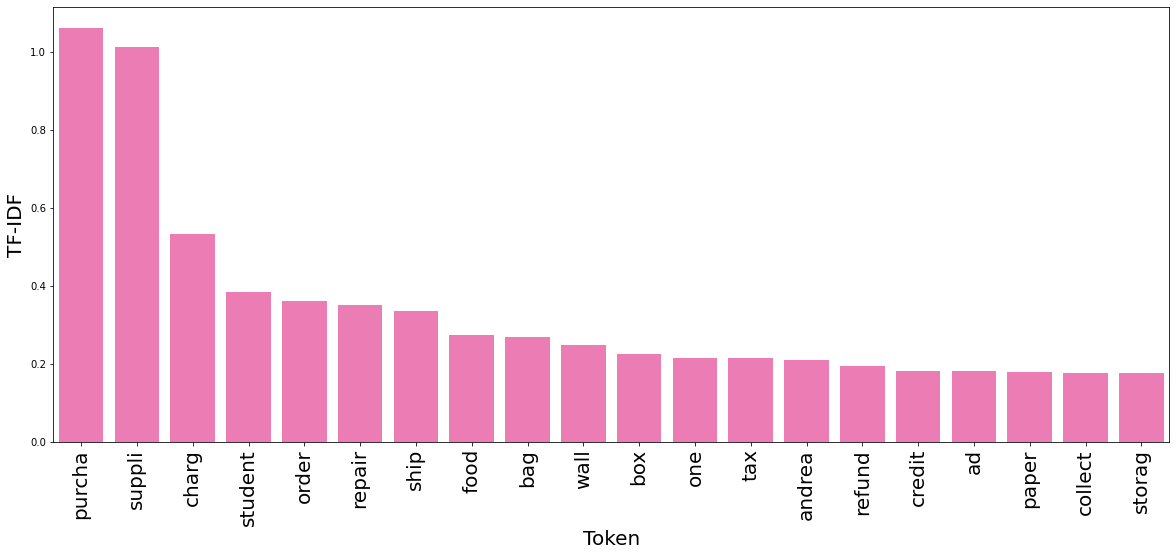

In [47]:
plt.figure(figsize=(20,8))
sns.barplot(x='token', y='tf_idf', 
            data=TF_IDF_3j[TF_IDF_3j["fullname"]=="Evans, Manuel"].sort_values(by=['tf_idf'], ascending=0).head(20),
           color="hotpink")
plt.xticks(fontsize=20, rotation=90)
plt.ylabel("TF-IDF", fontsize=20)
plt.xlabel("Token", fontsize=20)

Text(0.5, 0, 'Token')

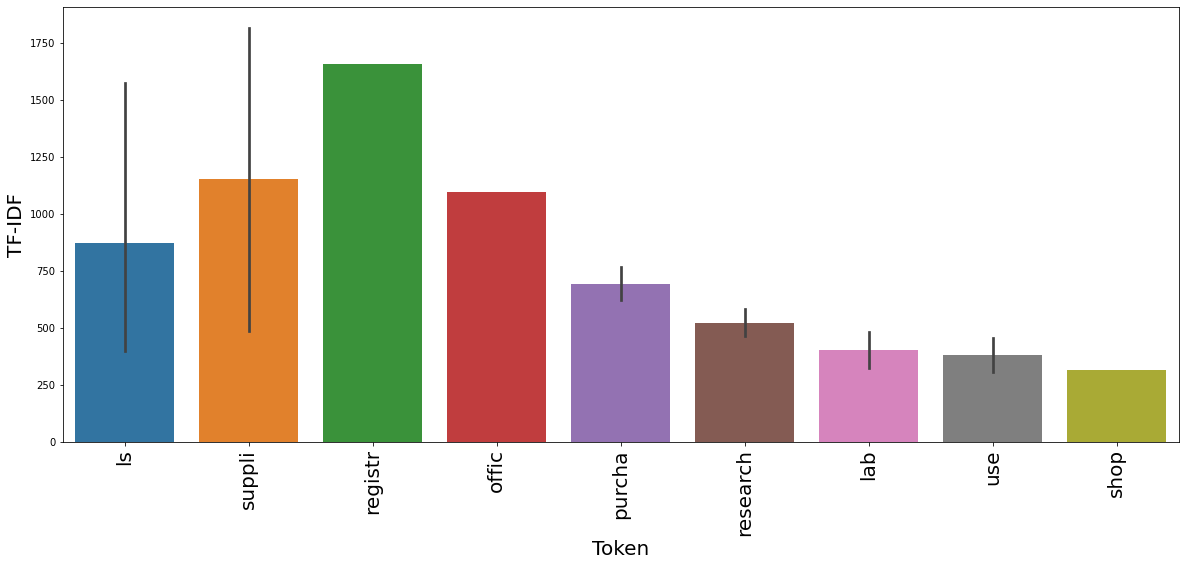

In [48]:
plt.figure(figsize=(20,8))
sns.barplot(x='token', y='tf_idf', 
            data=TF_IDF_3j.sort_values(by=['tf_idf'], ascending=0).head(20))
plt.xticks(fontsize=20, rotation=90)
plt.ylabel("TF-IDF", fontsize=20)
plt.xlabel("Token", fontsize=20)

Text(0.5, 0, 'Total Amount')

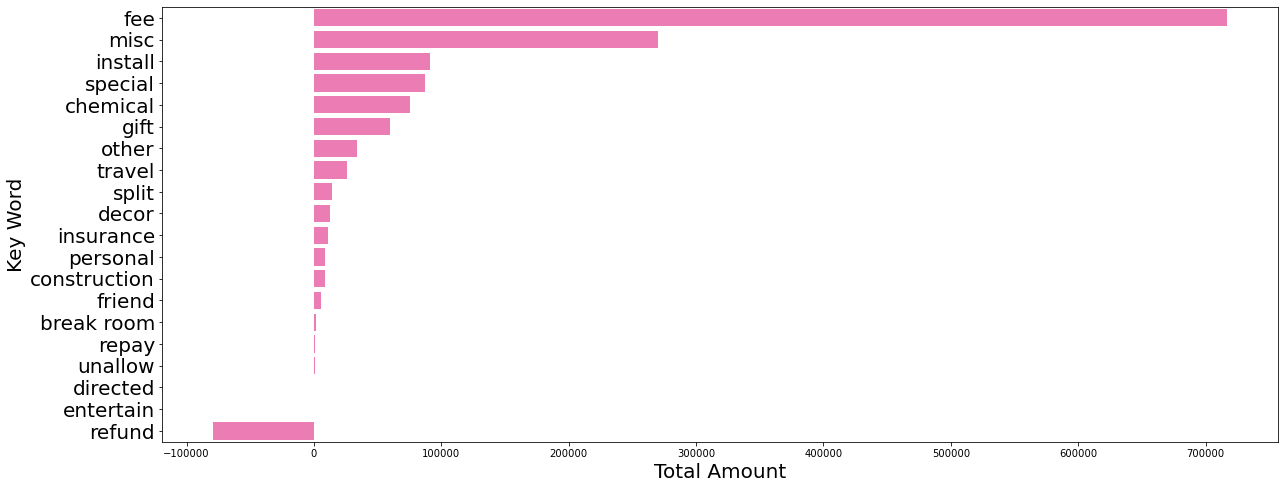

In [49]:
plt.figure(figsize=(20,8))
ax =sns.barplot(y='word', x='total_amount', 
            data=total_amount_key_word_3i2,
           color="hotpink")
plt.yticks(fontsize=20)
plt.ylabel("Key Word", fontsize=20)
plt.xlabel("Total Amount", fontsize=20)

Text(0, 0.5, 'Transactions')

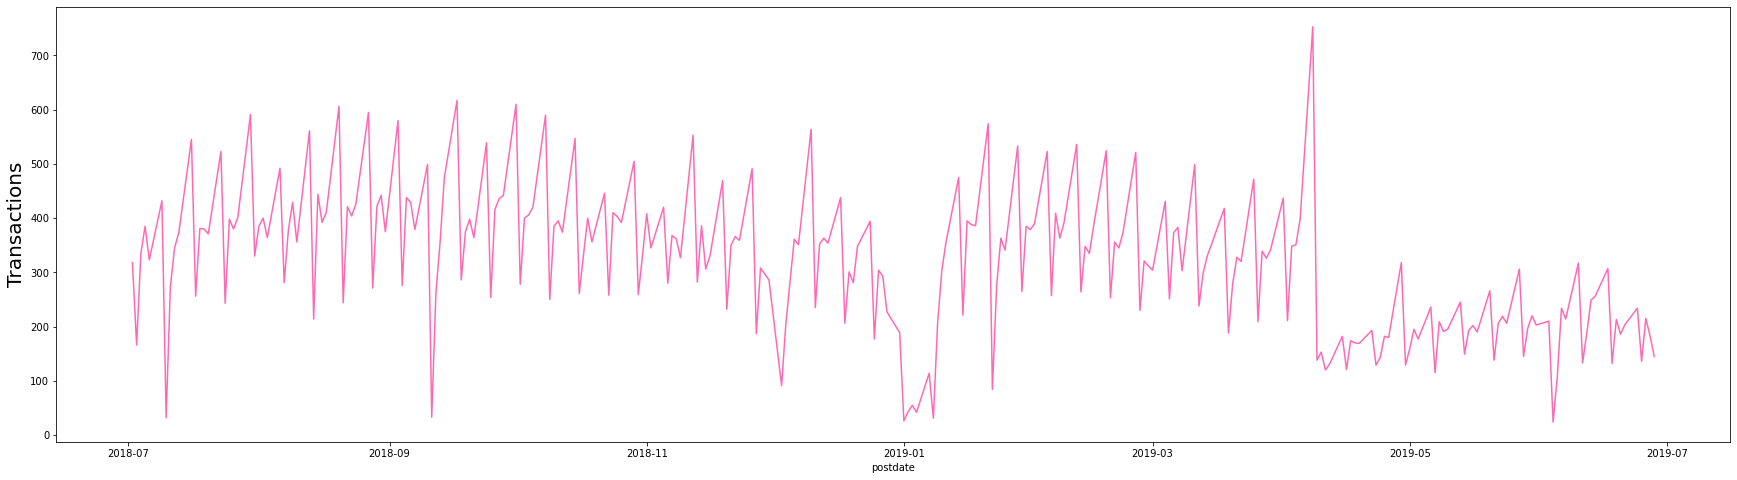

In [51]:
plt.figure(figsize=(30,8))
sns.lineplot(data=timeseries_df, x="postdate", y="count", color="hotpink")
plt.ylabel("Transactions", fontsize=20)

Text(0, 0.5, 'Transactions')

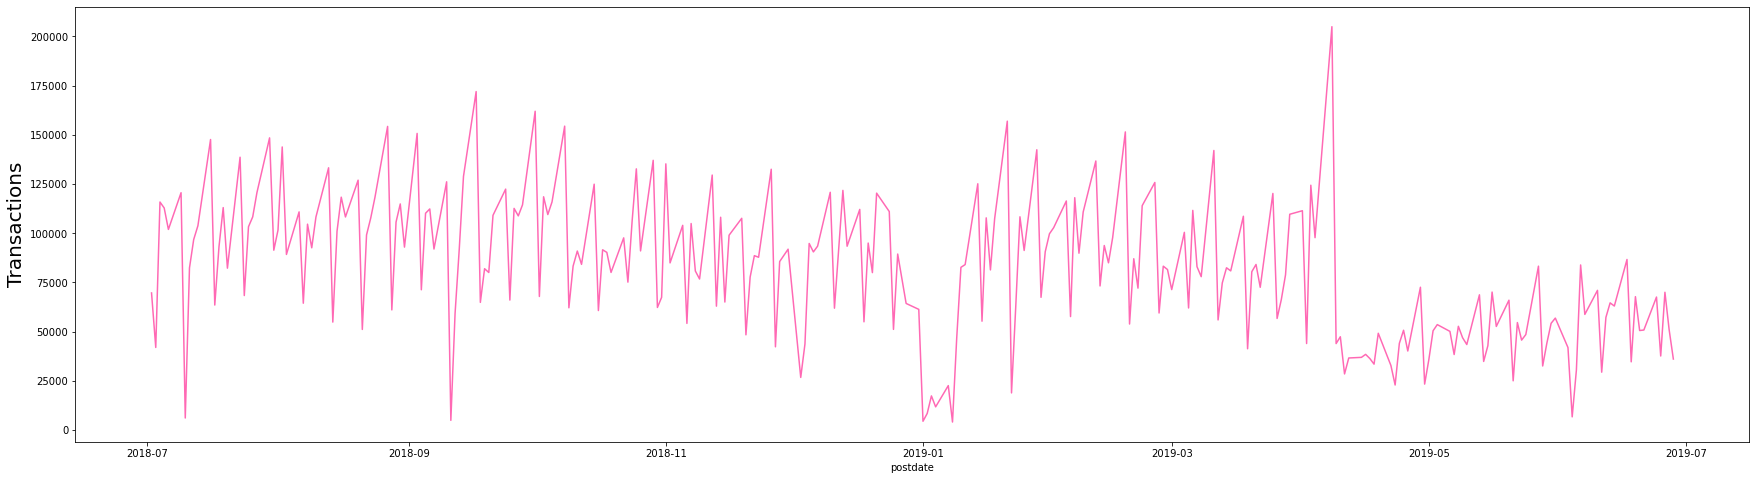

In [52]:
plt.figure(figsize=(30,8))
sns.lineplot(data=timeseries_df2, x="postdate", y="sum", color="hotpink")
plt.ylabel("Transactions", fontsize=20)

<ipython-input-53-c824eb23ee2c>:9: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f95edf76700> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles=[a1,a2])


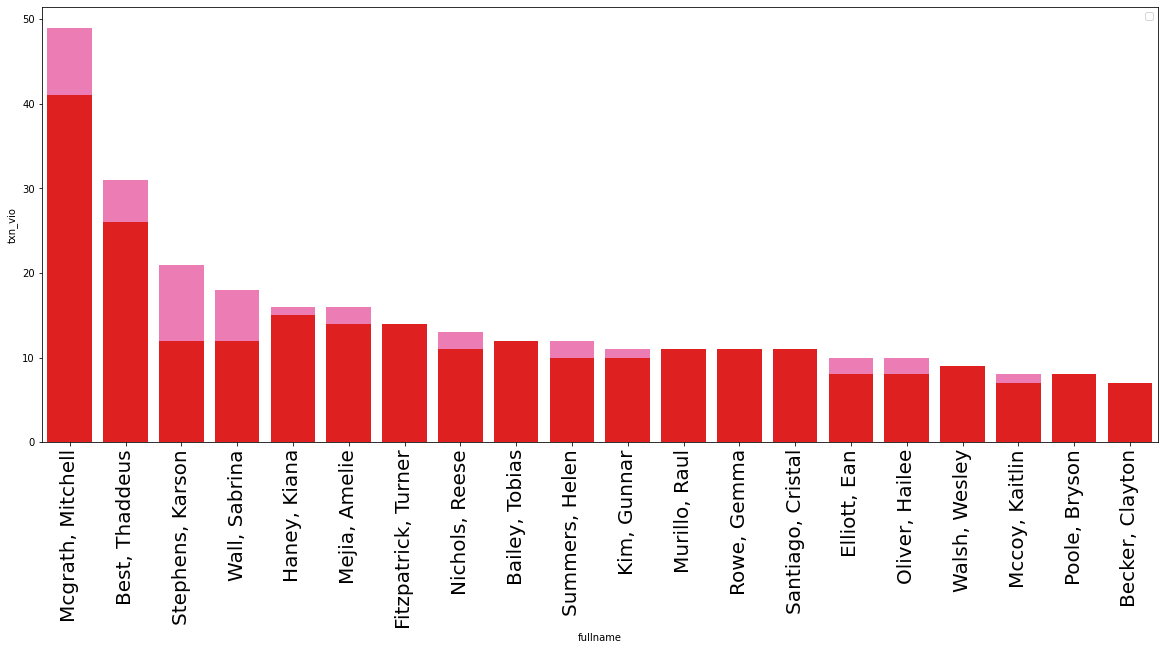

In [53]:
plt.figure(figsize=(20,8))
a1=sns.barplot(x='fullname', y='total_violations',
            data=txn_vio_table_3d4.head(20),
           color="hotpink", label="total_violations")
a2=sns.barplot(x='fullname', y='txn_vio',
            data=txn_vio_table_3d4.head(20),
           color="red",label="txn_violations")
plt.xticks(fontsize=20, rotation=90)
plt.legend(handles=[a1,a2])

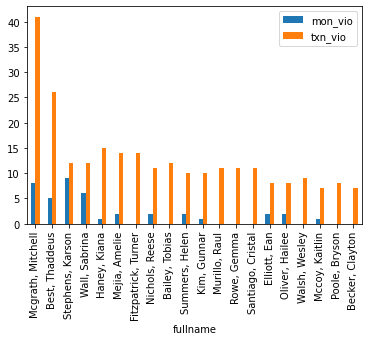

In [54]:
txn_vio_table_3d4.head(20).plot(x='fullname', y=['mon_vio', 'txn_vio'], kind='bar')

<Figure size 1440x576 with 0 Axes>

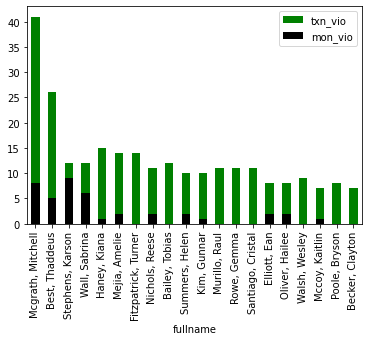

In [55]:
plt.figure(figsize=(20,8))
ax = txn_vio_table_3d4.head(20).plot(x='fullname', y='txn_vio', kind="bar", color="green")
#txn_vio_table_3d4.head(20).plot(x='fullname', y='mon_vio', kind="bar", ax=ax, color="green")
txn_vio_table_3d4.head(20).plot(x='fullname', y="mon_vio", kind="bar", ax=ax, color="black")